# Visualization

<a href="../../_slides/chapter-10-slides.html">See also the slides that summarize a portion of this content.</a>


In preparation for today, you learned many [data visualization tools from DataCamp](big-cheat-sheet.html#before-week-5).  In fact, if you're doing this reading before you do the DataCamp homework, I strongly suggest that you stop here, do the DataCamp first, and then come back here.

Rather than review those tools here, I will categorize them instead.  This page is therefore a reference in which you can look up the kind of data you *have* and see which visualizations make the most sense for it, and what each one accomplishes.

We will use two datasets throughout the examples below.  The first is a set of sales data for the employees of an imaginary company (Dunder Mifflin, perhaps?).  The data has the following format, organized by employee ID numbers, and including year, quarter, sales quantity, and bonus earned for each ID in each relevant time frame.

In [1]:
import pandas as pd
sales_df = pd.read_csv( './_static/fictitious-sales-data.csv' )
sales_df.head()

,emp_id,year,quarter,sales,bonus
0,1275342,2010,2,8.000000,0
1,1275342,2010,3,333.000000,0
2,1275342,2010,4,594.000000,2000
3,1275342,2011,1,276.066177,0
4,1275342,2011,2,340.000000,0


The second dataset is the basic NASDAQ data for Renewable Energy Group, Inc. (symbol REGI) for the first half of 2020.

In [2]:
regi_df = pd.read_csv( './_static/regi-prices-2020.csv' )
regi_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2-Jan-20,27.21,27.95,26.62,27.89,27.89,781100
1,3-Jan-20,28.16,28.95,27.73,28.82,28.82,1405100
2,6-Jan-20,28.53,28.81,28.00,28.39,28.39,716800
3,7-Jan-20,28.17,28.28,26.08,26.44,26.44,1378900
4,8-Jan-20,26.37,26.40,24.86,25.19,25.19,1195900


## What if I have two columns of numeric data?

This situation is *extremely common,* and that's why we address it first.  If we consider the two datasets described above, we can find many ways to create two columns of numeric data, including the following examples.
 1. The year and sales columns from `sales_df`
 2. The year and sales columns we would get by grouping `sales_df` by year
 3. The Volume and High columns from `regi_df`
 4. The index and the Close column from `regi_df`

```{admonition} Big Picture - Visualizing relations vs. functions
---
class: alert alert-primary
---
Recall that two columns of data always form a binary relation, but may or may not be a function.  Noticing whether the data are a function is very important when deciding how to visualize them.
 * A **function** can be shown with a **line plot**, as in algebra classes.
 * A **relation** that is not a function must be shown as a **scatterplot.**
```

Both scatterplots and line plots are drawn with `plt.plot()` in Matplotlib.  There are many ways to specify the plot type, as you've seen in DataCamp.  Let's look at the same four examples mentioned above.

**Example 1:** The year and sales columns from `sales_df` do not form a function, because each year has multiple sales figures.  We can see this if we visualize them with a scatterplot.

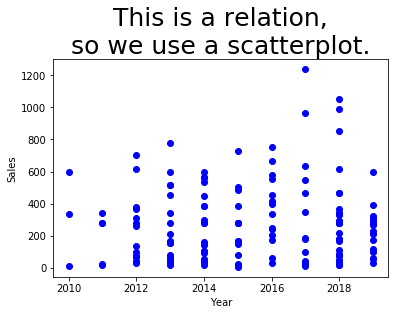

In [3]:
import matplotlib.pyplot as plt
plt.plot( sales_df['year'], sales_df['sales'], 'bo' ) # blue circles
plt.title( 'This is a relation,\nso we use a scatterplot.', fontdict={ "fontsize": 25 } )
plt.xlabel( 'Year' )
plt.ylabel( 'Sales' )
plt.show()

The same example would have gone quite wrong if we had attempted to use a line plot instead, as you can see below.  Matplotlib tries to connect the dots in sequence to show a line, but it doesn't make any sense, because the data is not a function.

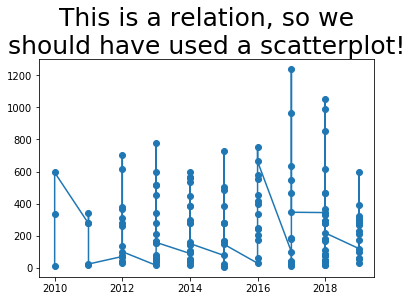

In [4]:
plt.plot( sales_df['year'], sales_df['sales'], '-o' ) # dots and lines
plt.title( 'This is a relation, so we\nshould have used a scatterplot!', fontdict={ "fontsize": 25 } )
plt.show()

It would have been even more hideous if the data hadn't been sorted by year.  Let's see what it would have been like if it had been sorted by employee instead, for instance.

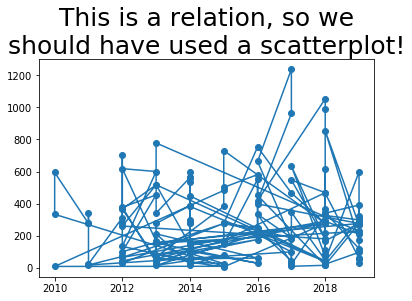

In [5]:
temp_df = sales_df.sort_values( 'emp_id' )
plt.plot( temp_df['year'], temp_df['sales'], '-o' ) # dots and lines
plt.title( 'This is a relation, so we\nshould have used a scatterplot!', fontdict={ "fontsize": 25 } )
plt.show()

The bad graphs just shown illustrate the importance of knowing whether your data is a function or relation, and choosing the appropriate plotting technique.  Let's see how line plots can look nice when the data *is* a function.

**Example 2:** If we group the sales data by year, then each year appears only once, and the relationship between year and sales becomes a function.  Let's use `sum()` to do the grouping, so that we can see total sales by year.

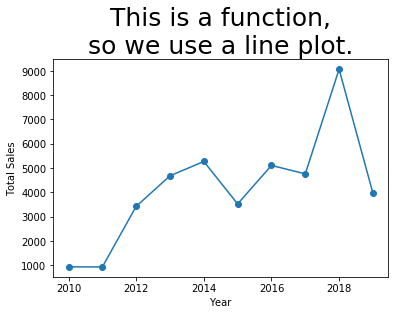

In [6]:
grouped_df = sales_df.groupby( 'year' ).sum()
plt.plot( grouped_df.index, grouped_df['sales'], '-o' ) # dots and lines
plt.title( 'This is a function,\nso we use a line plot.', fontdict={ "fontsize": 25 } )
plt.xlabel( 'Year' )
plt.ylabel( 'Total Sales' )
plt.show()

That plot looks the way we expect.  It is especially sensible because the independent variable ($x$ axis) is sequential, so it makes sense for us to think of the data as connected and flowing from left to right.

Note that if your data aren't already sorted by the independent variable, connecting the dots with lines will jump all over your plot as it plots points in the wrong order.  Use `sort_values()` to get the data in the right order, in such a case.

Let's consider one more example of a function and a non-function, but we'll do them quickly.

**Example 3:** The Volume and High columns from `regi_df` may or may not be a function; it depends on the data we happened to get.  The *meanings* of the columns indicate that they probably are not a function, if given enough historical data.  So we'll use a scatterplot.

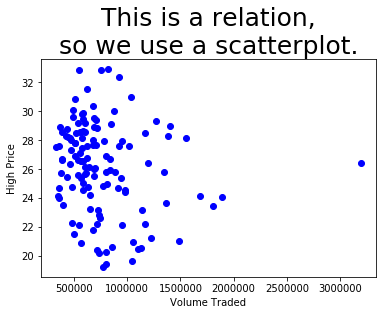

In [7]:
plt.plot( regi_df['Volume'], regi_df['High'], 'bo' ) # blue circles
plt.title( 'This is a relation,\nso we use a scatterplot.', fontdict={ "fontsize": 25 } )
plt.xlabel( 'Volume Traded' )
plt.ylabel( 'High Price' )
plt.show()

We can clearly see that there *might* be a collision in there of two $x$ values having the same $y$ value.  Even if they don't, we certainly wouldn't want to try connecting those dots with lines; it would be a meaningless mess.

**Example 4:** The index and the Close column from `regi_df` are a function, because each index represents a separate day, and thus only appears once in the data.  Let's see.

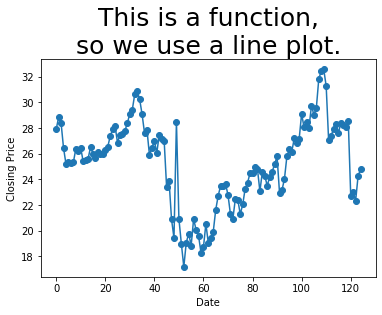

In [8]:
plt.plot( regi_df.index, regi_df['Close'], '-o' ) # dots and lines
plt.title( 'This is a function,\nso we use a line plot.', fontdict={ "fontsize": 25 } )
plt.xlabel( 'Date' )
plt.ylabel( 'Closing Price' )
plt.show()

## But can my two columns of data look more awesome?

Recall that the Seaborn library makes it easy to add histograms to both the horizontal and vertical axes of a standard ploot to get a better sense of the distribution.  This is possible with both line and scatter plots, but it is more commonly useful with scatterplots.

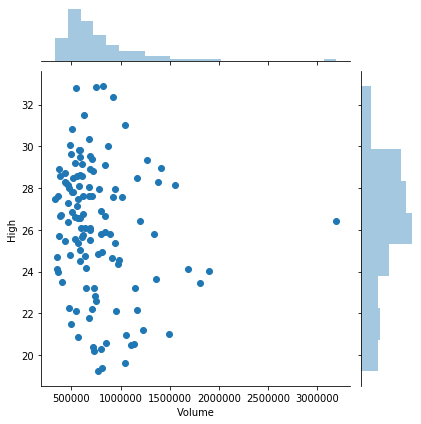

In [9]:
import seaborn as sns
sns.jointplot( x='Volume', y='High', data=regi_df )
plt.show()

If there were thousands of datapoints (or more), I suggest trying any of the following options.  I'll illustrate some of them using the same data we just saw, even thought it doesn't have thousands of points.
 1. Use `kind='kde'` in a joint plot to smooth the histograms, as shown in the first plot below.
 2. Use `alpha=0.5` or an even smaller number, so that points in your scatterplot that stack up on top of one another show different levels of density throughout the graph.
 3. Use `kind='hex'` to bin values within the scatterplot as well, again showing the varying density throughout the plot, as in the second plot below.

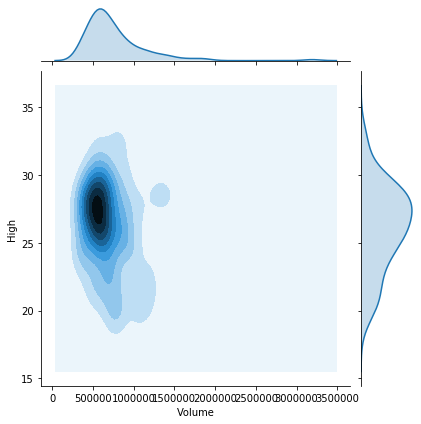

In [10]:
sns.jointplot( x='Volume', y='High', data=regi_df, kind='kde' )
plt.show()

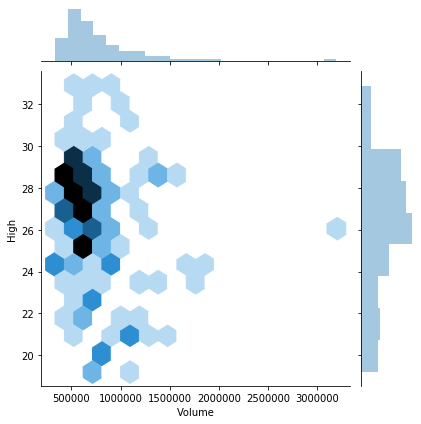

In [11]:
sns.jointplot( x='Volume', y='High', data=regi_df, kind='hex' )
plt.show()

## What if my two columns are very related?

Seaborn provides a few tools for showing how one variable depends on another.

First, you can plot a line of best fit over a scatterplot, together with confidence bars for the predictions made by that linear model.  Recall from GB213 that it is not always sensible to fit a linear model to data.  But in cases where it makes sense, Seaborn makes it easy to visualize.

Keep in mind that Seaborn is quite happy to show you a linear model even when it does not make any sense to do so!  Just because Python will plot it for you does not mean that you should ask it to!  Here's an example of just such a situation.

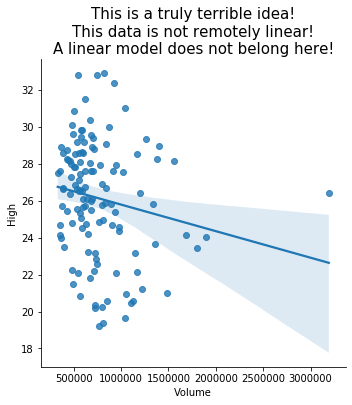

In [12]:
sns.lmplot( x='Volume', y='High', data=regi_df )
plt.title( 'This is a truly terrible idea!\n'
         + 'This data is not remotely linear!\n'
         + 'A linear model does not belong here!',
           fontdict={ "fontsize": 15 } )
plt.show()

Seaborn won't show you the coefficients of the model, nor measure its goodness of fit; see [the GB213 review](GB213-review-in-Python) for how to do those things in Python.

Of course, there are some situations where a linear model is reasonable, like the total sales over time plot from earlier.  Seaborn is fussy about using column names only in `lmplot`, so we have to move the index in as an actual column here.

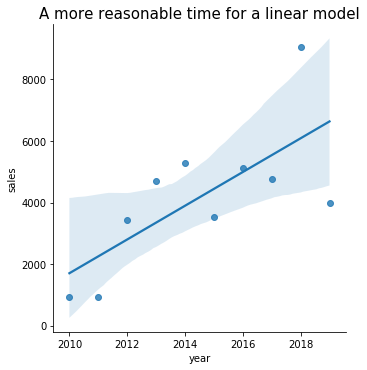

In [13]:
grouped_df['year'] = grouped_df.index
sns.lmplot( x='year', y='sales', data=grouped_df )
plt.title( 'A more reasonable time for a linear model',
           fontdict={ "fontsize": 15 } )
plt.show()

As you know from GB213, part of assessing whether linear regression is appropriate involves inspecting the residuals (the difference between each data point and the linear model).  Seaborn makes this easy, too.

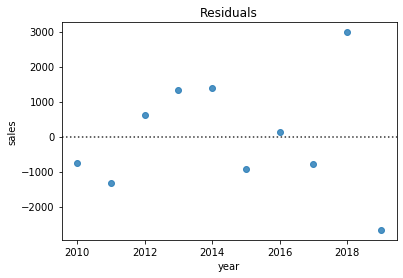

In [14]:
sns.residplot( x='year', y='sales', data=grouped_df )
plt.title( 'Residuals' )
plt.show()

## What if I have only one column of data?

The primary visualization tools appropriate for such a situation are variations on the idea of a histogram.  These include a standard histogram plus swarm plots, strip plots, and violin plots.  A secondary visualization in this situation is an ECDF, which we will return to below.

We can plot a standard histogram with `plt.hist()`, but this doesn't work very well for very small data sets.  It can also suffer from "binning bias," which distorts the actual distribution through the approximation inherent in clustering points into bars.  But with many data points distributed smoothly along the horizontal axis, it often works well.

When labeling a histogram, the $y$ axis is almost always "frequency" and the title should typically mention the idea of a "distribution."

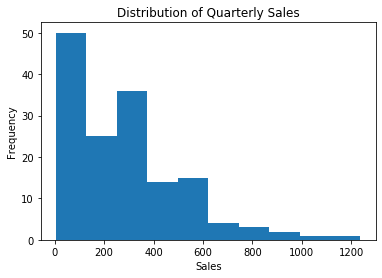

In [15]:
plt.hist( sales_df['sales'] )
plt.xlabel( 'Sales' )
plt.ylabel( 'Frequency' )
plt.title( 'Distribution of Quarterly Sales' )
plt.show()

Matplotlib's built-in `plt.hist()` works fine, but to upgrade your histogram game, consider checking out [Seaborn's `sns.distplot()`](https://seaborn.pydata.org/generated/seaborn.distplot.html), which also shows histograms, but with handy options for commonly-desired additional features.

To remove the problem of binning bias, you can try a swarm plot.  This works well with a small-to-medium number of data points, but becomes unmanageable for large datasets, because it attempts to give each data point its own visual space.  Also, data points are just plotted *close* to where they actually belong, so the distortion of a histogram's binning bias has been reduced, but not fully removed.  The picture is still an approximation of the actual data, but still much more accurate than a histogram.

Note that in a one-column swarm plot, there is no horizontal variable, and thus we do not label that axis.

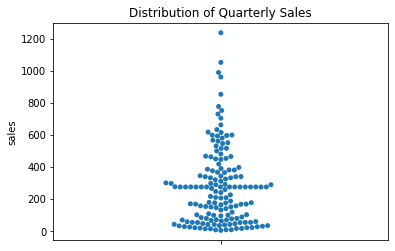

In [16]:
sns.swarmplot( y='sales', data=sales_df )
plt.title( 'Distribution of Quarterly Sales' )
plt.show()

A swarm plot can get quite wide if there are many data points clustered in a small area.  If your data has this problem, try using a strip plot, which keeps a constant width everywhere.

This comes at a price, however.  Some data points are stacked on top of one another, so you won't really be able to see as much variation in density.  You can combat this problem by choosing `alpha=0.5` or some smaller number, so that overlapping data points show variations in color.

Finally, a strip plot uses random jittering to place the points, so it won't always look the same each time you render it!

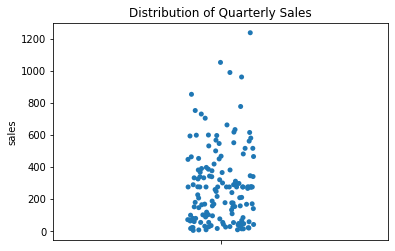

In [17]:
sns.stripplot( y='sales', data=sales_df )
plt.title( 'Distribution of Quarterly Sales' )
plt.show()

Lastly, if you have enough data, you may want to simply smooth it out into curves instead.  This is not a faithful representation of sparse data, but it can be a faithful representation of a very large dataset.

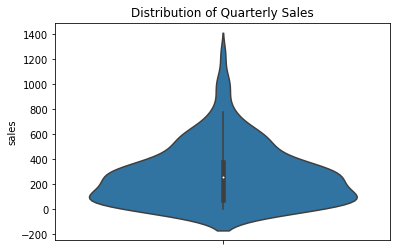

In [18]:
sns.violinplot( y='sales', data=sales_df )
plt.title( 'Distribution of Quarterly Sales' )
plt.show()

Finally, if you care only about the quartiles of the distribution (25%, 50%, 75%) and the outliers, you can use a box plot.

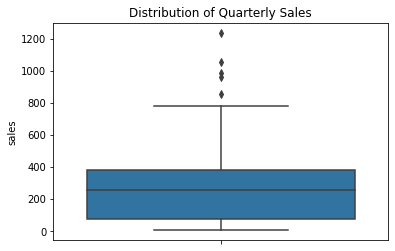

In [19]:
sns.boxplot( y='sales', data=sales_df )
plt.title( 'Distribution of Quarterly Sales' )
plt.show()

Every one of the options above can also be shown horizontally instead.  Just use `orient='h'` in the plotting command.

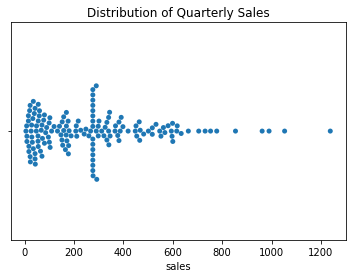

In [20]:
sns.swarmplot( y='sales', data=sales_df, orient='h' )
plt.title( 'Distribution of Quarterly Sales' )
plt.show()

## Can't I test a single column for normality?

I'm so glad you asked!  One of the most common assumptions in statistics is that a dataset comes from an approximately normally distributed population.  We can get a sense of whether that holds true for some dataset we have by plotting the cumulative distribution function (CDF) of the data against that of a normal distribution, as you saw in DataCamp.  (A CDF from data is called an empirical CDF, or ECDF.)

While DataCamp did it manually, there are libraries that can handle it for you.  [The notes for Chapter 9](chapter-9-math-and-stats) suggested a Learning On Your Own activity about Pingouin, a new Python statistics module, which implements QQ plots (quartile-quartile plots), for comparing two cumulative distribution functions.

Here, we'll use what you saw in DataCamp.

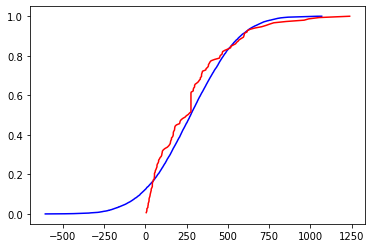

In [21]:
import numpy as np

# create an ECDF from the data
ecdf_xs = sales_df['sales'].sort_values()
ecdf_ys = np.arange( 1, len(ecdf_xs)+1 ) / len(ecdf_xs)

# simulate a normal CDF with the same mean and std
sample_mean = ecdf_xs.mean()
sample_std = ecdf_xs.std()
samples = np.random.normal( sample_mean, sample_std, size=10000 )
normal_xs = np.sort( samples )
normal_ys = np.arange( 1, len(normal_xs)+1 ) / len(normal_xs)

# plot them on the same graph
plt.plot( normal_xs, normal_ys, 'b-' )
plt.plot( ecdf_xs, ecdf_ys, 'r-' )
plt.show()

This case is hard to judge visually.  The graphs are quite different for the leftmost 30% of the graph, and somewhat different for the middle, only converging at the end.  If the project you're working on is something quick and dirty that just needs to be approximate, you might call this distribution close enough to normal.  But if your project demands high accuracy, such as something in health care, you should resort to official statistical tests for normality of an empirical distribution.  We do not cover those in MA346.

## What if I have lots of columns of data?

If you want to compare them as distributions, then all of the Seaborn plotting commands from the previous section still apply.  They will show multiple distributions side-by-side, horizontally or vertically.  Here are two examples.

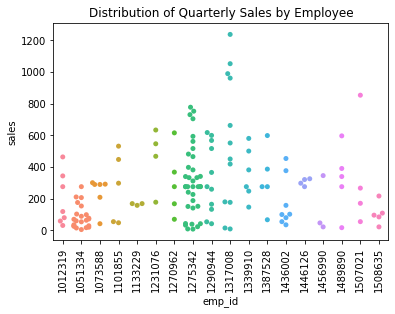

In [22]:
sns.swarmplot( x='emp_id', y='sales', data=sales_df )
plt.title( 'Distribution of Quarterly Sales by Employee' )
plt.xticks( rotation=90 )
plt.show()

When showing only one variable (earlier), a box plot was quite boring.  But when showing many variables, the simplicity of a box plot helps reduce visual clutter and make the variables much easier to compare.

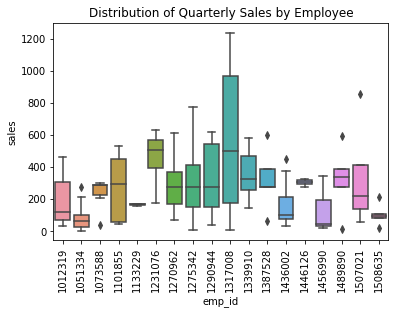

In [23]:
sns.boxplot( x='emp_id', y='sales', data=sales_df )
plt.title( 'Distribution of Quarterly Sales by Employee' )
plt.xticks( rotation=90 )
plt.show()

What if we wanted to plot the four price distributions in the REGI dataset, the open, close, low, and high prices, side-by-side?  Right now, these are stored in three separate columns in the data.  But as you can see from the code above, Seaborn expects the data to be in a single column, and it will use a separate column to split the values into categories.

Of course, we know how to combine four columns of related data into one based on our work in a previous week--it's melting!

In [24]:
melted_df = regi_df.melt( id_vars=['Date'], value_vars=['Open','Close','Low','High'],
                          var_name='Type of price', value_name='Price' )
melted_df.head()

,Date,Type of price,Price
0,2-Jan-20,Open,27.21
1,3-Jan-20,Open,28.16
2,6-Jan-20,Open,28.53
3,7-Jan-20,Open,28.17
4,8-Jan-20,Open,26.37


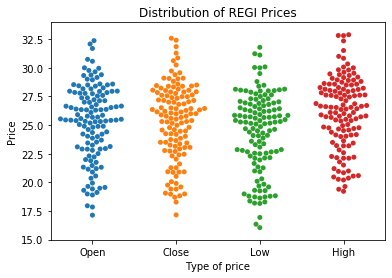

In [25]:
sns.swarmplot( x='Type of price', y='Price', data=melted_df )
plt.title( 'Distribution of REGI Prices' )
plt.show()

And you can use the old, trusty histogram to compare distributions as well.  Simply pass an array of Series instead of just one Series when calling `plt.hist()`.

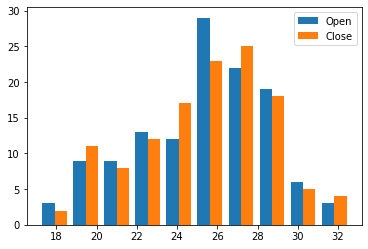

In [26]:
plt.hist( [ regi_df['Open'], regi_df['Close'] ], label=[ 'Open', 'Close' ] )
plt.legend()
plt.show()

The REGI dataset is already set up for us to do this, because each distribution is in its own column.  If it had not been so (but had been like the sales data, for instance), recall that the opposite of melting is pivoting, and that would get the data in the needed form.

It's also possible to do overlapping histograms with transparent bars, but to get it to look good, you need to create the bin boundaries in advance and tell each histogram to use the same boundaries.  Otherwise, `plt.hist()` will choose different bins for each Series of data.

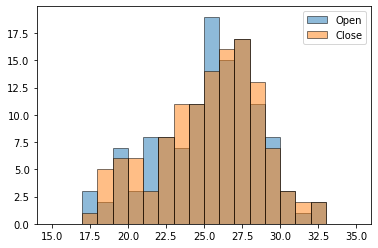

In [27]:
bins = np.linspace( 15, 35, 21 ) # 20 bins from x=15 to x=35
plt.hist( regi_df['Open'], bins, label='Open', alpha=0.5, edgecolor='black' )
plt.hist( regi_df['Close'], bins, label='Close', alpha=0.5, edgecolor='black' )
plt.legend()
plt.show()

There's a lot more that could be said about plotting distributions; for instance, [here's a cool blog post](https://towardsdatascience.com/sorry-but-sns-distplot-just-isnt-good-enough-this-is-though-ef2ddbf28078) about how to make an even more beautiful plot that compares several distributions.

## What if I need to know if the colums are related?

DataCamp showed you two visualizations for this.  One focuses on giving you some visual intuition for whether the variables are related, by showing you the shape of all possible scatterplots of your data.  It's called a pair plot because it pairs up the variables in every possible way.  Let's try it on the REGI dataset; the explanation follows the picture.

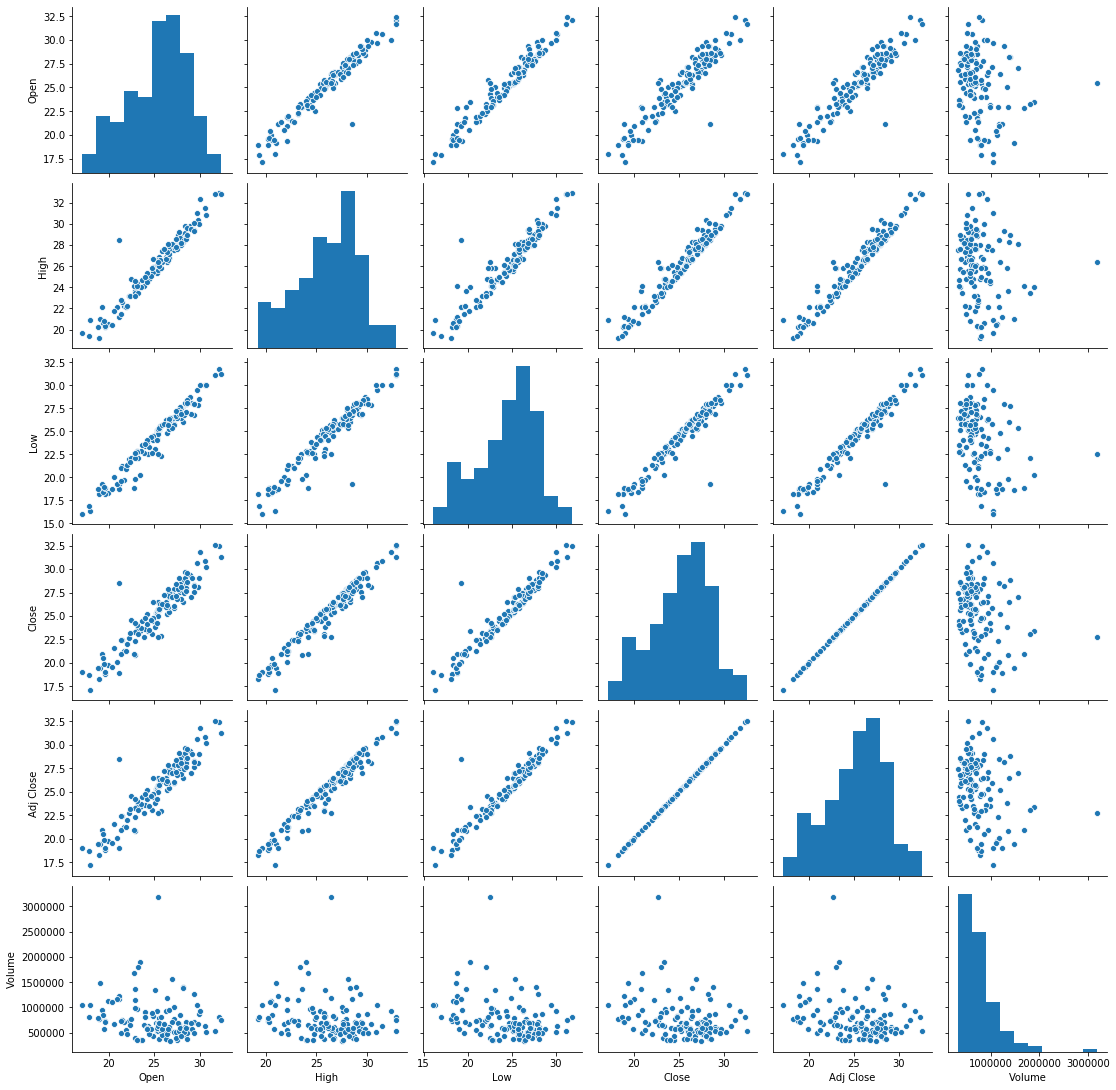

In [28]:
sns.pairplot( regi_df )
plt.show()

The histograms shown along the diagonal of this graph are histograms of each variable, which are not the interesting part of the visualization.

Next, take a look at the scatterplots that are *not* in the last row or last column.  Almost all of them show a very tight linear relationship, but this is unsurprising because of the meaning of the data.  For instance, the leftmost scatterplot in the second row relates the High price of a stock with the Open price of the stock on the same day.  Because the stock opens and closes at approximately the same price on most days (no enormous fluctuations in any one day), these numbers are always close together, and thus highly correlated.  The same goes for all the histograms except the final row and final column.

The final row and final column include the Volume variable.  One might naturally wonder whether the volume of the stock traded on a day correlates to anything about the value of the stock on that day.  In the case of Renewable Energy Group, Inc., for the first half of 2020, the answer seems to be no.  There does not seem to be any discernable relationship in those histograms; they're just fuzzy blobs of data points.

Earlier I mentioned that `sns.pairplot()` was the technique that would give us some visual intuition for relationships, and it did.  But there is another visualiation technique that doesn't show us as much visually, but gives us more easy-to-read measurements of the relationships among the variables.  It's a heat map of the covariance matrix.

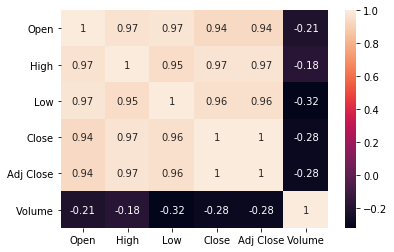

In [29]:
numeric_columns_only = regi_df.drop( 'Date', axis=1 )
correlation_coefficients = np.corrcoef( numeric_columns_only, rowvar=False )
sns.heatmap( correlation_coefficients, annot=True )
plt.xticks( np.arange(6)+0.5, numeric_columns_only.columns )
plt.yticks( np.arange(6)+0.5, numeric_columns_only.columns, rotation=0 )
plt.show()

Of course, because we used the same data, we still find out that all the prices are highly correlated (because they're organized by day) and the volume isn't really correlated much with anything.  But it's much easier to tell both the correlations and the lacks of correlation when we have hard numbers to look at, rather than having to estimate it ourselves from shapes.

## Summary of plotting tools

I know that was a huge amount to take in!  So let's make it simpler:

### With one numeric column of data:

| If you want to see this | Then use this |
|-------------------------|---------------|
| Just the distribution's quartiles and outliers | Box plot |
| Simple approximation of the distribution | Histogram |
| Very good approximation of the distribution, maybe very wide | Swarm plot |
| Good approximation of the distribution, not too wide | Strip plot |
| Good approximation of a large distribution, smoothed | Violin plot |
| How similar is the distribution to normal? | Overlapping ECDFs |

### With two numeric columns of data:

| If you want to see this | Then use this |
|-------------------------|---------------|
| A graph of my data, which is a function | Line plot |
| The shape of my data, which is a relation | Scatter plot |
| The shape of my data, which is a relation, plus each variable's distribution | Joint plot |
| The line of best fit through my data | `sns.lmplot` |

### With many numeric columns of data:

| If you want to see this | Then use this |
|-------------------------|---------------|
| The quartiles and outliers of each | Side-by-side box plots |
| Simple approximation of the distributions | Histograms with side-by-side bars |
| Very good approximation of each distribution (can't fit too many) | Side-by-side swarm plots |
| Good approximation of each distribution (can fit more) | Side-by-side strip plots |
| Good approximation if the distributions are large (will be smoothed) | Side-by-side violin plots |
| The shape of all possible two-column relationships | Pair plot |
| A measurement of all possible correlations | Heat map of correlation coefficients |


## Techniques *not* to use (and why)

You may notice that we did not cover **pie charts** anywhere in this tutorial.  Matplotlib can certainly produce pie charts for you, but visualization experts recommend against them, because viewers tend to have trouble assessing the exact meanings of the shapes.  It's much harder to compare how much bigger one pie slice is to another than it is to compare, say, two bars on a histogram, or to points on a graph.  So I suggest you avoid pie charts.

We also did not cover **bubble charts** anywhere in this tutorial.  (A bubble chart is one in which each data point is plotted by a large circle, proportional to one of the variables in the data.)  These are very popular in modern data visualization because they are eye-catching and attractive.  But visualization experts recommend against these as well, because each person perceives the bubble sizes differently.  For example, some people perceive the magnitude of a bubble on a graph in proportion to its radius, some perceive it in proportion to its area, and others are somewhere in between.

Visualization is a type of communication, and doing it well means focusing on the message you want to convey.  Using a visualization that gives each viewer a different message is a bad idea.  Unpredictability of viewer response is undesirable.  So I suggest you avoid bubble charts as well.

We did not cover charts with **3D elements,** as Microsoft Excel often creates.  This is because those elements also tend to distort the viewer's perception of the data and make it unclear exactly how extreme (or not) they're perceiving what you're showing.  Thus we avoid any 3D elements in charts for the same reason we avoid bubble charts.

Finally, DataCamp showed you how to fit polynomial models to data using `sns.regplot()`.  But I did not cover it hear, because it is dangerous to dive into polynomial models without a solid grounding in mathematical modeling, which this course does not cover.  Before using a polynomial model, you would need a solid, domain-specific reason to believe that such a model is applicable, or `sns.regplot()` will (obediently) produce result that are unreliable if used for prediction.  Consequently, I won't cover `sns.regplot()` in MA346.

## What about plot styles?

I didn't cover plot styles here, but there's nothing wrong with them.  I simply left them out because most of them are only cosmetic; [see this week's section in the DataCamp cheat sheet](big-cheat-sheet#before-week-5) for details on items like `sns.set()`, `plt.subplot()`, and `plt.style`.

There are also some good blog posts on Matplotlib styles you might want to check out, such as [this](https://towardsdatascience.com/the-last-matplotlib-tweaking-guide-youll-ever-need-dbd4374a1c1e) or [this](https://towardsdatascience.com/cyberpunk-style-with-matplotlib-f47404c9d4c5).

But there is one stylistic element I want to highlight:  DataCamp showed that `plt.annotate()` can be used to place text on a plot, which can be very useful for drawing a viewer's attention to the part of the graph that you want them to focus on.  Consider the following graph, which we produced earlier, but now with a prominent annotation to explain why sales were so high one year.

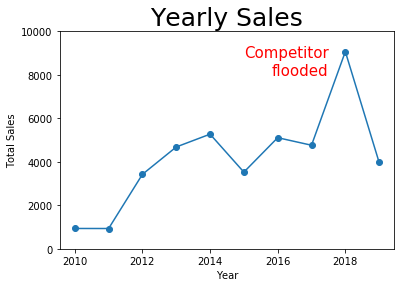

In [30]:
plt.plot( grouped_df.index, grouped_df['sales'], '-o' ) # dots and lines
plt.title( 'Yearly Sales', fontdict={ "fontsize": 25 } )
plt.xlabel( 'Year' )
plt.ylabel( 'Total Sales' )
plt.ylim( [ 0, 10000 ] )
plt.annotate( 'Competitor\nflooded', xy=(2017.5,8000),
              color='red', size=15, ha='right' )
plt.show()

## There's so much more!

Because visualization is a huge topic, I list several Learning On Your Own opportunities for extending your visualization knowledge and sharing it with the rest of the class.

```{admonition} Learning on Your Own - Plot with Less Code
---
class: alert alert-danger
---
In some cases, you can plot data directly from pandas without needing to use Matplotlib.  [Investigate this blog post for details](https://towardsdatascience.com/the-simplest-way-to-create-complex-visualizations-in-python-isnt-with-matplotlib-a5802f2dba92) and decide on the best format by which to report that information to the class.
```

```{admonition} Learning on Your Own - Geographical Plots
---
class: alert alert-danger
---
Drawing data on a map is extremely common and useful, but we don't have time to cover it in today's notes.  [Here's a blog post about an easy way to do so in Python,](https://www.earthdatascience.org/tutorials/introduction-to-leaflet-animated-maps/) but you don't need to feel bound to that one.  There are many map toolkits for use in Python-based visualizations.  Feel free to choose the one you like best and decide on the best format by which to report on it to the class.  As an example, try showing how housing costs vary across the U.S. by plotting the property values in the mortgage dataset from Week 3 on a map.
```

```{admonition} Learning on Your Own - Tableau
---
class: alert alert-danger
---
One of the most famous tools for data visualization in industry is Tableau.  Although coding in Python, R, etc., is always the most flexible option, tools like Tableau are far easier and faster when you don't need maximal flexibility.  Take a Tableau tutorial and report to the class on its key features.  Ensure you cover how to get a copy of Tableau, how to get data into it, and what it's best at.
```

```{admonition} Learning on Your Own - Visualization Design Principles
---
class: alert alert-danger
---
I've suggested a few concepts [up above](#techniques-not-to-use-and-why) that can guide you towards effective visualizations and away from ineffective ones.  But there is a lot to learn about visualization design principles that we can't cover here.  Consider checking out [this blog post](https://flowingdata.com/2017/01/24/one-dataset-visualized-25-ways/) or [this free online book](https://serialmentor.com/dataviz/) and chooosing about five important concepts you learn that are relevant to our work in MA346.  Find a good way to report them to the rest of the class, and be sure to include plenty of visual examples in your work of what to do and what not to do.
```
